# A joint multilevel model for CAR 
Using multilevel.CARLeroux
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF] [ S | GMRF] $$

In [ ]:
## Run the script
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')
source("model2_multilevel/run-joint-multilevel.R")


[1] "Load data source and preprocess"


Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Setting up the model.
Generating 50000 post burnin and thinned (if requested) samples.
  |===========================                                           |  38%

## Remember to check likelihood modelfit

In [182]:
model2$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3958.7090      903.8225     4031.9079      791.4370    -2065.3159 
loglikelihood 
   -1075.5320

In [183]:
model2$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),1.9775,1.6391,2.3280,1000,47.9,41.5,-1.9
Disttoroadm,0.0001,0.0000,0.0003,1000,47.9,64.8,0.7
Populationm,0.0004,0.0002,0.0005,1000,47.9,32.8,-1.9
Elevationm,-0.0015,-0.0017,-0.0013,1000,47.9,29.2,3.3
MeanTempm,-0.0027,-0.0029,-0.0024,1000,47.9,18.6,0.0
tau2,8.7429,6.7967,11.0551,1000,100.0,5.2,-3.0
rho,1.0000,1.0000,1.0000,NA,NA,NA,NA


## Some plots and analysis for convergence


In [175]:
library(coda)

## $\tau^{2}$

In [190]:
plot(model3$samples$)
#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

ERROR: Error in plot(model3$samples$tau2): object 'model3' not found


## $\sigma^2$

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


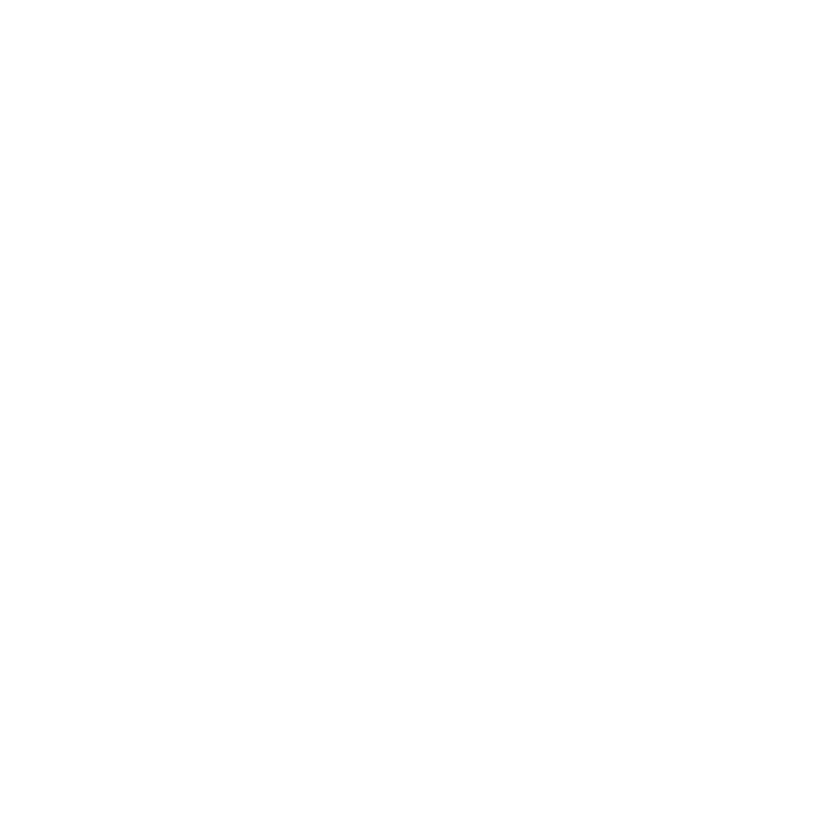

In [185]:
plot(model2$samples$sigma2)
#plot(results$ind.model.S$model.results$samples$sigma2)
#plot(results$ind.model.P$model.results$samples$sigma2)

## $\beta$

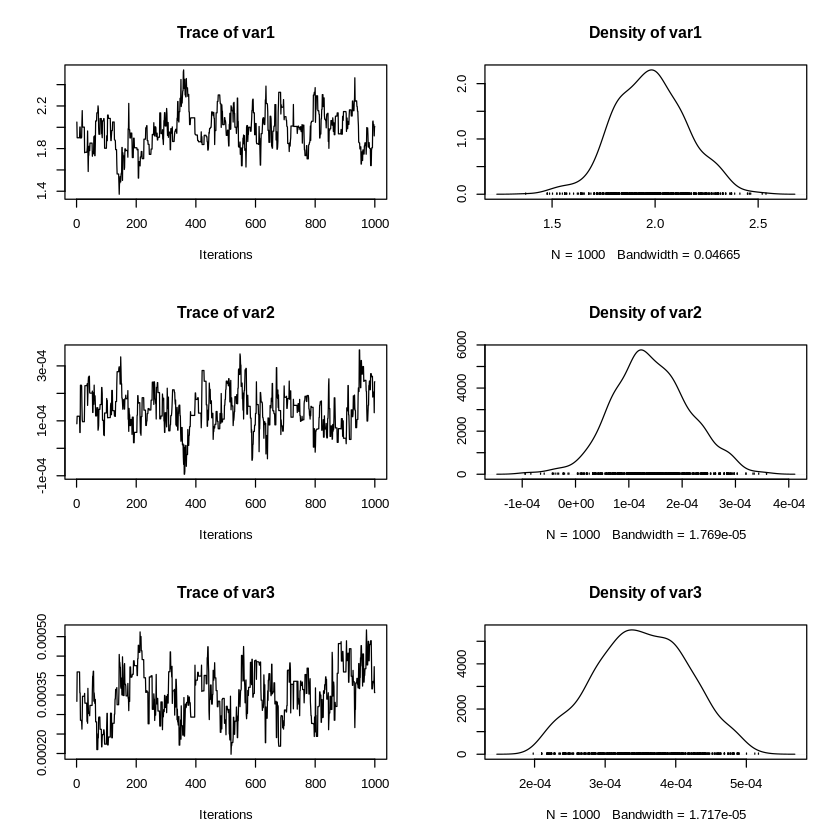

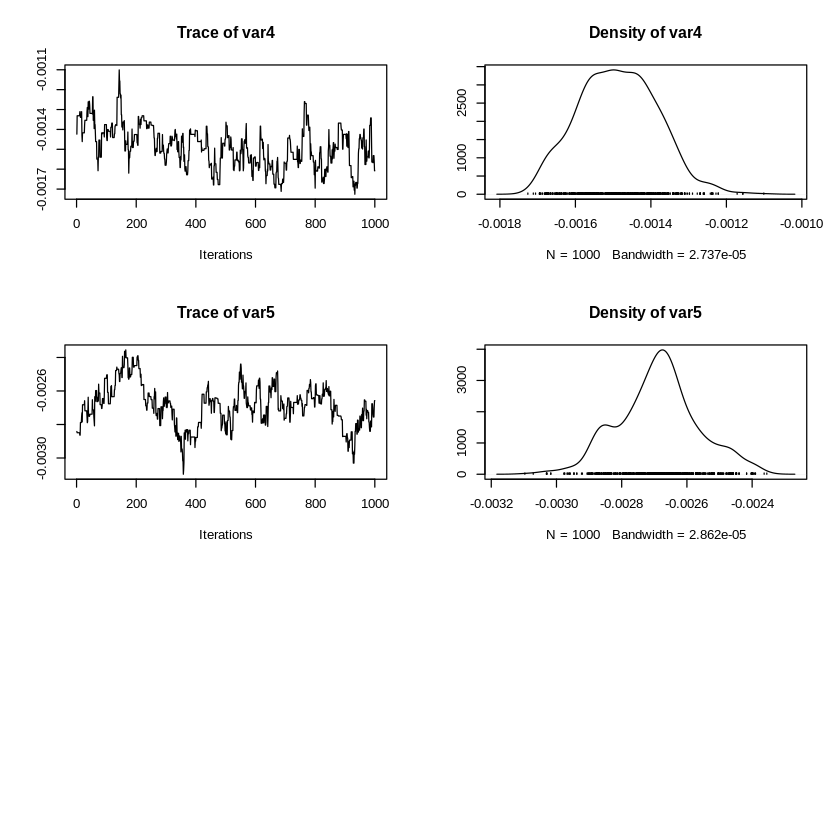

In [186]:
plot(model2$samples$beta)

#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

### Extract and export Random Effects in the shape of raw sample

In [188]:
model2$samples$zeta

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 1 
Thinning interval = 1 
[1] NA

In [155]:

sample.re <- t(model2$samples$phi + model2$samples$zeta)
re.chain <- cbind(TDF$cellids,sample.re)
file2 <- '/outputs/presence_only_models/modelCAR_model2_randomeffect_multilevel.csv'
write.csv(re.chain,file2)

ERROR: Error in model2$samples$phi + model2$samples$zeta: non-conformable arrays


In [166]:
sample.re <- t(model2$samples$phi)
re.chain <- cbind(TDF$cellids,sample.re)
file2 <- '/outputs/presence_only_models/modelCAR_model2_phi_multilevel.csv'
write.csv(re.chain,file2)

In [167]:
sample.re <- t(model2$samples$zeta)
re.chain <- cbind(TDF$cellids,sample.re)
file2 <- '/outputs/presence_only_models/modelCAR_model2_zeta_multilevel.csv'
write.csv(re.chain,file2)

Warning message in cbind(TDF$cellids, sample.re):
“number of rows of result is not a multiple of vector length (arg 1)”

In [168]:
## P and S
## divide samples for S and P according to the order given up
fitted = model2$fitted.values
S <- fitted[1:nK]
P <- fitted[(nK +1) : (2*nK) ]
chain = cbind(TDF$cellids,S,P)
file_ = '/outputs/presence_only_models/modelCAR_model2_PS_multilevel.csv'
write.csv(chain,file_)


## Diagnostics, Mr. Gelmans, et.al

## Sample the posterior 

In [161]:
post.sample_p = data.frame(model2$samples$fitted)

In [163]:
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
## divide samples for S and P according to the order given up
pred.S <- pss[,1:nK]
pred.P <- pss[,(nK +1) : (2*nK) ]
sumpss <- colSums(pred.S)
nsample <- nrow(pred.S)
prob_pss <- sumpss / nsample
sumpss <- colSums(pred.S)
nsample <- nrow(pred.S)
prob_pss <- sumpss / nsample
probpres = prob_pps * prob_pss

In [165]:
chain = cbind(TDF$cellids,probpres,prob_pps,prob_pss)
file_ = '/outputs/presence_only_models/modelCAR_model2_fitted_multilevel.csv'
write.csv(chain,file_)

## Posterior análisis with a varying C $\tau^2, \sigma^2$ denominator

In [609]:
# Read the file
bfile = '/outputs/presence_only_models/joint-model2-benchmark-denominator.csv'
res <- read.csv(bfile)

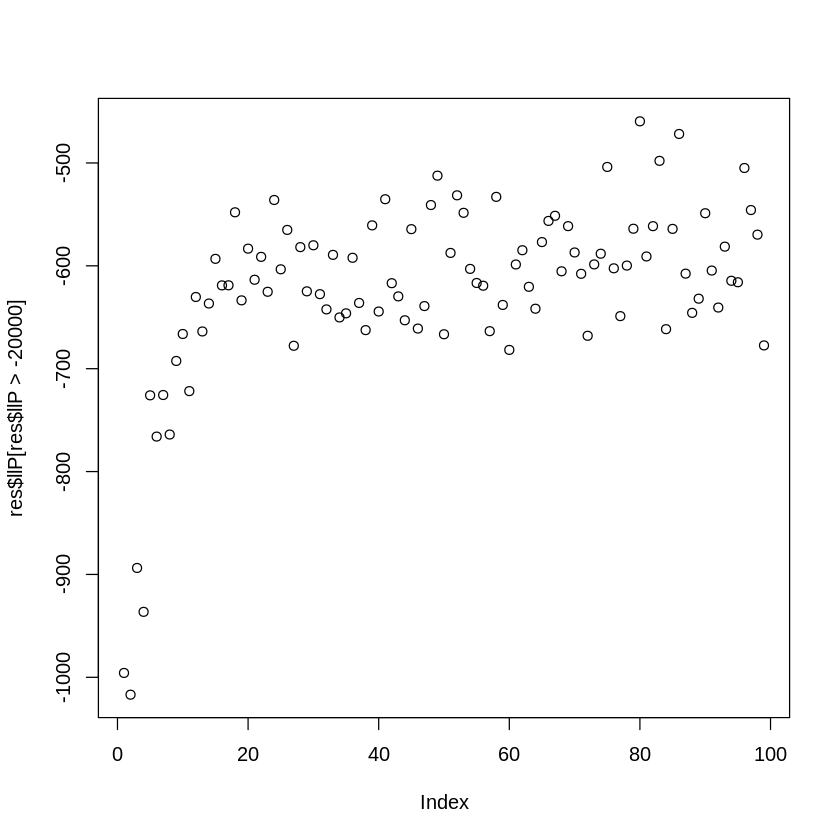